<a href="https://colab.research.google.com/github/HarshaV05/rand.stuff.imp/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("drive/My Drive/DS/faithful.csv")

In [0]:
df.set_index(['Unnamed: 0'], inplace = True)

In [0]:
df.head()

,eruptions,waiting
Unnamed: 0,,
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [0]:
df.loc[1]

eruptions     3.6
waiting      79.0
Name: 1, dtype: float64

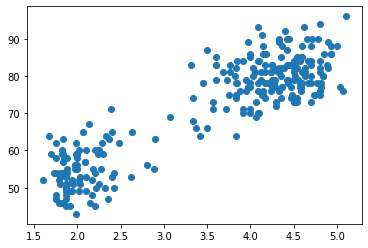

In [0]:
import matplotlib.pyplot as plt

plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [0]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS.fit(df)
X_norm = SS.transform(df)

In [0]:
X_norm.shape

(272, 2)

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2)
km.fit(X_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
centroids = km.cluster_centers_

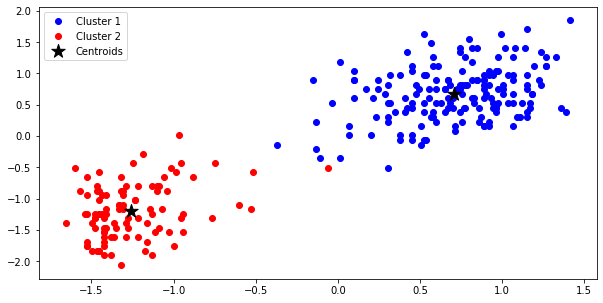

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(X_norm[km.labels_ == 0, 0], X_norm[km.labels_ == 0, 1], color = 'blue', marker = 'o', label = 'Cluster 1')
plt.scatter(X_norm[km.labels_ == 1, 0], X_norm[km.labels_ == 1, 1], color = 'red', marker = 'o', label = 'Cluster 2')
plt.scatter(centroids[:,0], centroids[:,1] , color = 'black', marker = '*', s = 200, label = 'Centroids')
plt.legend()

In [0]:
from matplotlib.image import imread

# Read the image
img = imread('drive/My Drive/DS/my_img.jpg')
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

# Run the Kmeans algorithm
km = KMeans(n_clusters=30)
km.fit(X)

# Use the centroids to compress the image
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

KeyboardInterrupt: ignored